In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../data/Car_Raw_Data.csv")
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
dataset.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
dataset = dataset.apply(lambda col: col.fillna(col.median()) if col.dtype in ['float64', 'int64'] else col, axis=0)

Text(0.5, 1.0, 'Car Price Description')

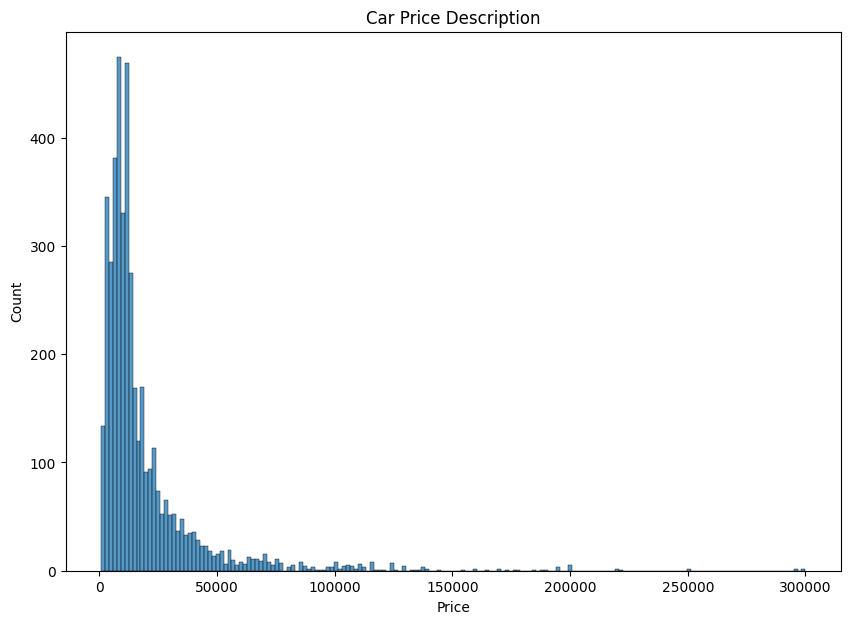

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(dataset['Price'])
plt.title("Car Price Description")

In [7]:
quanitle = dataset['Price'].quantile(q = 0.99)
quanitle

np.float64(125000.0)

In [18]:
updated_dataset  = dataset[dataset['Price'] < quanitle]
updated_dataset.describe()

,Price,Mileage,EngineV,Year
count,4298.000000,4298.00000,4298.000000,4298.000000
mean,17362.085845,162.85342,2.750314,2006.459516
std,18164.306872,105.11571,5.001625,6.697379
min,600.000000,0.00000,0.600000,1969.000000
25%,7000.000000,89.00000,1.900000,2003.000000
50%,11500.000000,157.00000,2.200000,2008.000000
75%,20500.000000,230.00000,3.000000,2012.000000
max,124999.000000,980.00000,99.990000,2016.000000


Text(0.5, 1.0, 'Before removing Outliars')

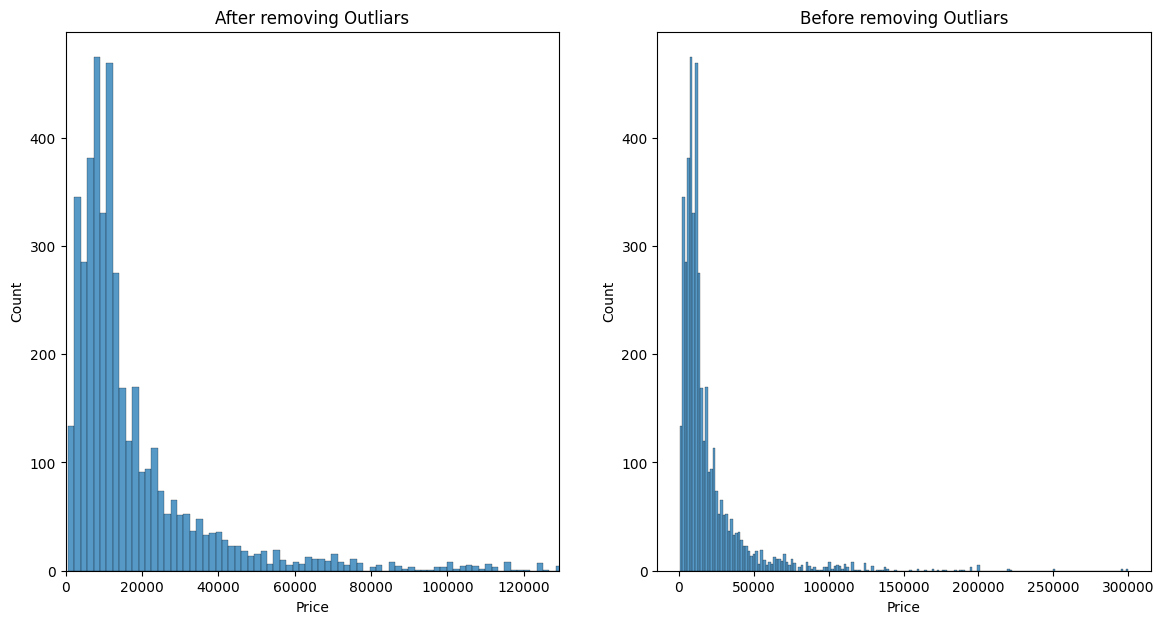

In [9]:
# Before and after removing outlier
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.histplot(dataset['Price'])
plt.title('After removing Outliars')
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.histplot(dataset['Price'])
plt.title('Before removing Outliars')

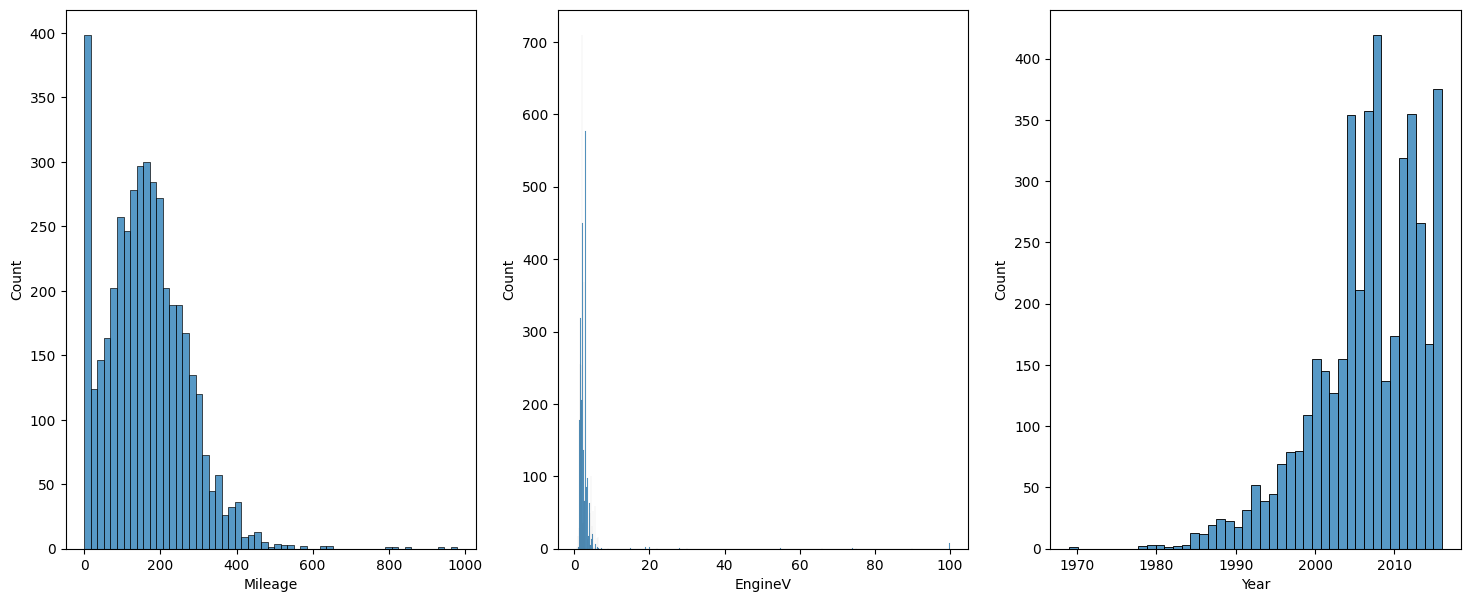

In [12]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.histplot(updated_dataset['Mileage']);

plt.subplot(1,3,2)
sns.histplot(dataset['EngineV'])

plt.subplot(1,3,3)
sns.histplot(dataset['Year']);

In [20]:
## Mileage Column.
quantile = car_1['Mileage'].quantile(0.99)  # it return a single value
car_2  = car_1[car_1['Mileage']< quantile]

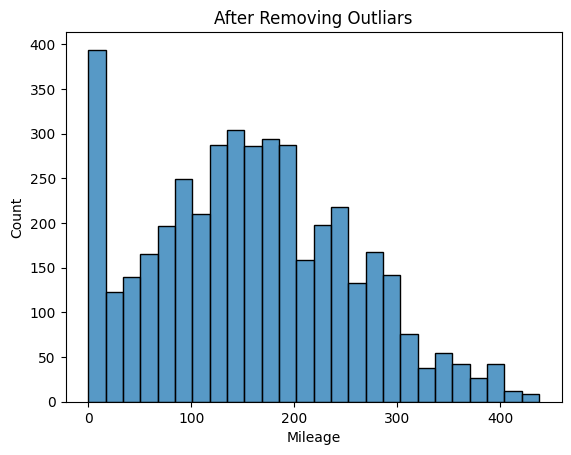

In [22]:
# plotting the Milage column
sns.histplot(car_2['Mileage']);
plt.title('After Removing Outliars');

In [15]:
q = dataset['Price'].quantile(q = 0.99) # it return a single value
q

np.float64(125000.0)

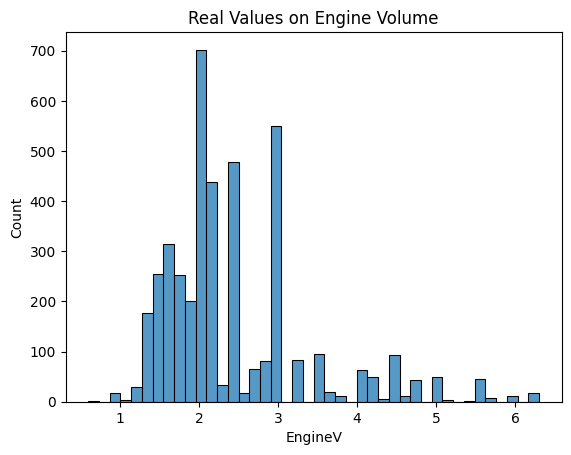

In [24]:
# as here i know the max engine volume can be is 6.5

car_3 = car_2[car_2['EngineV']<6.5]

# plotting the values again
sns.histplot(car_3['EngineV']);
plt.title('Real Values on Engine Volume');

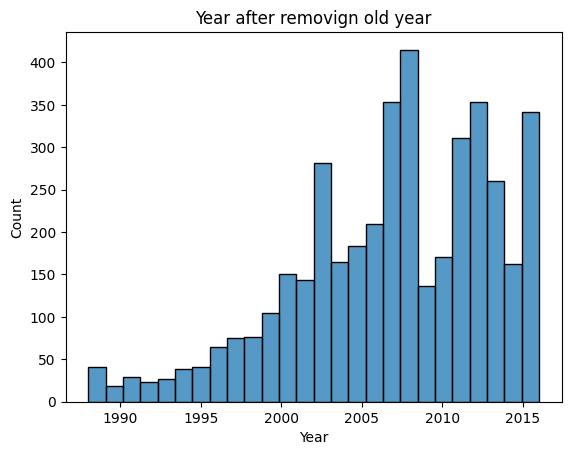

In [26]:
# this time i will keep only 1% data and remove the 99th percentile.
q = car_3['Year'].quantile(0.01);
car_4 = car_3[car_3['Year']>q] # removing the 1th percentile data

# potting again
sns.histplot(car_4['Year']);
plt.title('Year after removign old year');

In [27]:
# reset the indexes
car_clean = car_4.reset_index(drop=True)

# checiking the data
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4167,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4168,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4169,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4170,Toyota,14200.0,sedan,31,2.2,Petrol,yes,2014,Corolla


In [28]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4172,4172.000000,4172,4172.000000,4172.000000,4172,4172,4172.000000,4172
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,902,NaN,1574,NaN,NaN,1956,3783,NaN,192
mean,NaN,17679.513209,NaN,157.843001,2.456695,NaN,NaN,2006.862656,NaN
std,NaN,18268.843613,NaN,96.875300,0.938553,NaN,NaN,6.145801,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7300.000000,NaN,87.000000,1.900000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,154.500000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20800.000000,NaN,223.250000,3.000000,NaN,NaN,2012.000000,NaN


In [29]:
# saving the data for next modeule

car_clean.to_csv('Car_cleaned.csv', index=False)
print('Data Saved')

Data Saved
